<a href="https://colab.research.google.com/github/mercedes6115/ai/blob/main/Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 머신러닝
# 컴퓨터가 스스로 데이터를 학습하여 문제를 해결하는 과정 

# 지도학습: 정답이 있다
# 비지도학습: 정답이 없다 

# 회귀와 분류
# 회귀 문제(regression): 연속적인 데이터간의 점화식 찾기 
#                        금값의 현황 주가 변화 등등

# 분류 문제(classification): 데이터간의 관계를 찾아서 연속적이지 않은(이산적인) 영역 찾기
#                            개,고양이 분류 와인 분류 등등 

In [1]:
!pip install kaggle

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"a05090509","key":"1942c6a51cacdb986dc8f95b912603f2"}'}

In [3]:
ls -1ha kaggle.json

kaggle.json


In [6]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning이 발생하지 않도록 해줍니다.
!chmod 600 ~/.kaggle/kaggle.json

In [7]:
!kaggle datasets download -d uciml/iris

  0% 0.00/3.60k [00:00<?, ?B/s]
100% 3.60k/3.60k [00:00<00:00, 2.89MB/s]


In [8]:
!kaggle datasets download -d uciml/iris

iris.zip: Skipping, found more recently modified local copy (use --force to force download)


In [10]:
!unzip iris.zip

Archive:  iris.zip
  inflating: Iris.csv                
  inflating: database.sqlite         


In [184]:
import pandas as pd
import io
data = pd.read_csv('Iris.csv')    # sepal 꽃받침 
                                  # petal 꽃잎
# data.head()
# data.info()
# data.tail()
# data.keys()
data.columns


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [25]:
# data frame --> pandas의 자료형 
data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [27]:
data.isnull().sum() # 중간에 빈 값이 있는지 확인 : --> 있는 경우 보통 평균치를 대입
                    # 결측치는 자료를 수집하거나 정리하는 과정에서 누락되어 유효한 데이터가 없는 경우이다
                    # 카테고리 (숫자이지만 수학적 의미로 쓰이지 않는경우) 같은 경우는 최빈값으로 대체한다 
                    # 유효한 값으로 대체하거나 결측값을 삭제하는 처리는 반드시 필요하다 
                    

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [28]:
# 상관 관계 분석 
data.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


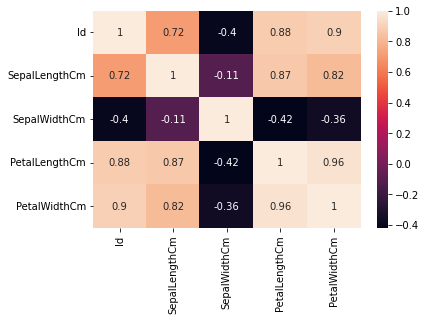

In [29]:
import seaborn as sns
sns.heatmap(data=data.corr(),annot=True)

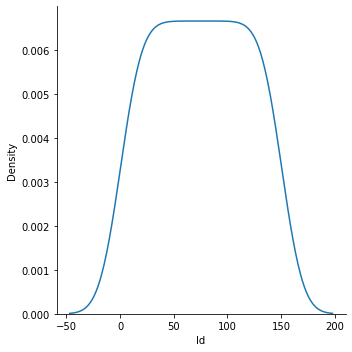

In [33]:
# 정규 분포 확인 
sns.displot(x ='Id',data = data,kind='kde')

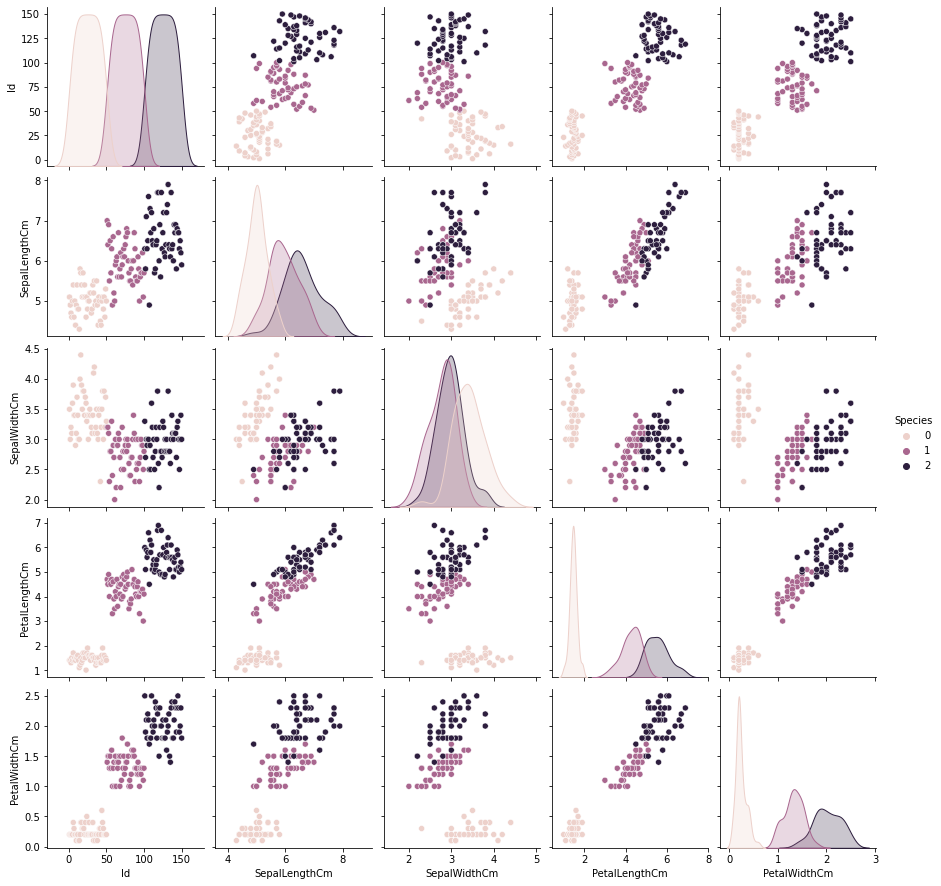

In [51]:
sns.pairplot(data,hue='Species')

In [104]:
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Import metric for performance evaluation
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder() # LabelEncoder-object maken
data['Species']=le.fit_transform(data['Species'])

data.sample(3)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
1,2,4.9,3.0,1.4,0.2,0
66,67,5.6,3.0,4.5,1.5,1
126,127,6.2,2.8,4.8,1.8,2


In [144]:
X = data.iloc[:,:-1].values
y = data.iloc[:,-1].values   # Species 열만 선택 iloc함수 원하는 열 인덱스 접근 loc 는 boolean접근 
#X = data.loc[:,'PetalLengthCm':'PetalWidthCm'].values # 학습시킬 목록 2가지 추출 
#y = data.iloc[:,-1].values # 정답만 추출
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, shuffle = True, random_state = 4) # random_state 결과값 겥게 하기 위한 설정 

print("X_train: ",len(X_train))
print("X_test: ",len(X_test))
print("y_train: ",len(y_train))
print("y_test: ",len(y_test))

X_train:  120
X_test:  30
y_train:  120
y_test:  30


In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

def reports(modelName):
    # print(classification_report(y_test, y_predict))
    # print(confusion_matrix(y_test, y_predict))
    accuracy = accuracy_score(y_predict,y_test) # 정확도 예측값 
    print(modelName,' accuracy is: ',accuracy)

Model = LogisticRegression(solver='liblinear') # 회귀 분류
Model.fit(X_train, y_train)
y_predict = Model.predict(X_test)
y_predict
reports('LogRegression')

LogRegression  accuracy is:  0.9333333333333333


In [152]:
def sklearn_knn(train_data, label_data, test_data, k):
    # knn classifier 모델 생성
    knn = KNeighborsClassifier(n_neighbors=k) # 몇개를 찾을 것인지 
    # Train -> X_train
    knn.fit(train_data, label_data)
    # Predict -> X_test 
    predict_label = knn.predict(test_data) # 예측 
    return predict_label

y_predict = sklearn_knn(X_train, y_train, X_test, 2)
y_predict # 30개에 대한 예측 레이블 
reports('KNN')

KNN  accuracy is:  1.0


In [162]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

# 각 피쳐들이 고유의 축을 앚는 공간을 이룬다고 가정한다 
# 모든 에디터를 공간 내의 좌표에 점으로 표시하고 각 데이터가 속하는 군집을 이룬다고 가정한다 
# 이때 각 군집까지의 거리를 최대한 멀리 유지하는 경계면을 찾는다 


Model = SVC(kernel='linear') # 경계선의 직선,곡선 형태 설정 
Model.fit(X_train, y_train)
y_predict = Model.predict(X_test)

reports('Support Vector Classification')

Support Vector Classification  accuracy is:  1.0


In [188]:
Model = DecisionTreeClassifier(max_depth = 5)
Model.fit(X_train, y_train)
y_predict = Model.predict(X_test)

reports('Decision Tree')

Decision Tree  accuracy is:  1.0


[Text(0.6, 0.8333333333333334, '5.1 <= 100.5\ngini = 0.662\nsamples = 120\nvalue = [34, 45, 41]\nclass = Iris-setosa'),
 Text(0.4, 0.5, '5.0 <= 0.8\ngini = 0.49\nsamples = 79\nvalue = [34, 45, 0]\nclass = Iris-setosa'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]\nclass = Iris-setosa'),
 Text(0.6, 0.16666666666666666, 'gini = 0.0\nsamples = 45\nvalue = [0, 45, 0]\nclass = Iris-setosa'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 41\nvalue = [0, 0, 41]\nclass = Iris-setosa')]

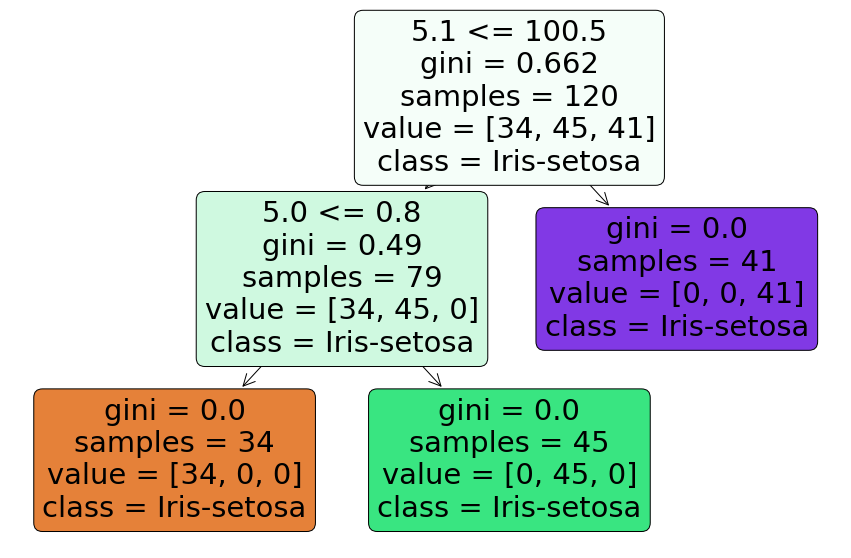

In [199]:
from sklearn import tree
import matplotlib.pyplot as plt
plt.figure( figsize=(15,10) )
tree.plot_tree(Model, 
               class_names=data['Species'],
               feature_names=data['SepalLengthCm'],
               impurity=True, filled=True,
               rounded=True)

In [159]:
Model = GaussianNB()
Model.fit(X_train, y_train)
y_predict = Model.predict(X_test)

reports('Naive Bayes')

[2 0 2 2 2 1 1 0 0 2 0 0 0 1 2 0 1 0 0 2 0 2 1 0 0 0 0 0 0 2]
Naive Bayes  accuracy is:  1.0
